In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fundus_data_toolkit.datamodules.classification import DDRDataModule, IDRiDDataModule, EyePACSDataModule, AptosDataModule
from fundus_data_toolkit.datamodules.utils import merge_existing_datamodules
from fundus_data_toolkit.datamodules import CLASSIF_PATHS, SEG_PATHS

In [3]:
from nntools import NNOpt


/home/clement/Documents/Projets/NNTools/src/nntools/utils/plotting.py:151: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


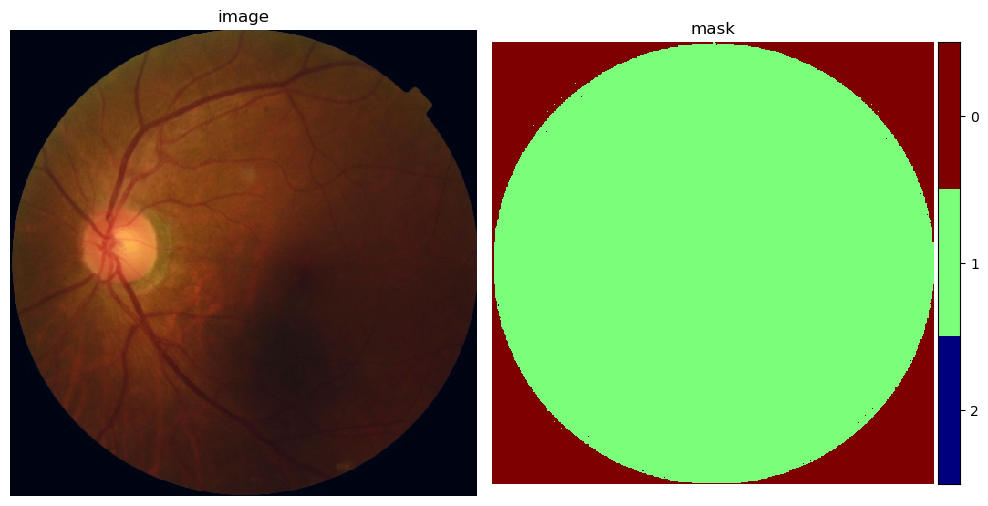

In [4]:
img_size = (512, 512)
idrid_datamodule = IDRiDDataModule(CLASSIF_PATHS.IDRID, img_size=img_size, batch_size=64, 
                                   valid_size=0.2,
                                   use_cache=True, num_workers=8,
                                   precise_autocrop=True,
                                   cache_option=NNOpt.CACHE_DISK).setup_all()
eyepacs_datamodule = EyePACSDataModule(CLASSIF_PATHS.EYEPACS, img_size=img_size, batch_size=64, use_cache=True, num_workers=8,
                                       precise_autocrop=True,
                                   cache_option=NNOpt.CACHE_DISK).setup_all()
aptos_datamodule = AptosDataModule(CLASSIF_PATHS.APTOS, img_size=img_size, batch_size=64, use_cache=True, num_workers=8,
                                   precise_autocrop=True,
                                   cache_option=NNOpt.CACHE_DISK).setup_all()
ddr_datamodule = DDRDataModule(CLASSIF_PATHS.DDR, img_size=img_size, batch_size=64, use_cache=True, num_workers=8,
                                   cache_option=NNOpt.CACHE_DISK, precise_autocrop=True).setup_all()
ddr_datamodule.train.plot(0)

In [5]:
datamodule = merge_existing_datamodules([idrid_datamodule, aptos_datamodule])

In [6]:
from tqdm.notebook import tqdm
dataloaders = datamodule.train_dataloader()
for batch in tqdm(dataloaders, total=len(dataloaders)):
    pass

  0%|          | 0/63 [00:00<?, ?it/s]